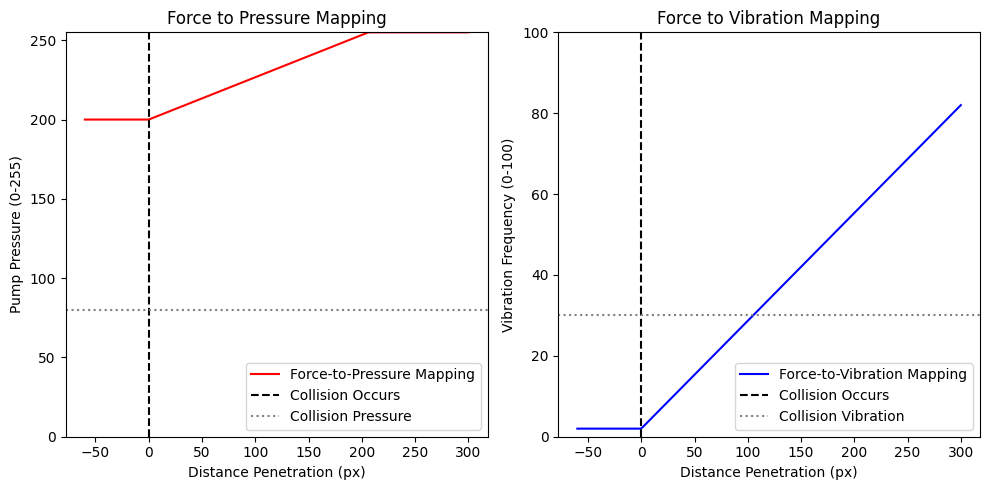

In [19]:
import csv
import numpy as np
import matplotlib.pyplot as plt

# Function to load CSV config files
def load_config(filename):
    config = {}
    with open(filename, mode="r") as file:
        reader = csv.reader(file)
        next(reader)  # Skip header
        for row in reader:
            key, value = row
            try:
                config[key] = float(value)  # Convert to float for numerical values
            except ValueError:
                config[key] = value  # Keep as string if conversion fails
    return config

# Load configuration files
config = load_config("config.csv")
mapping_config = load_config("map_2.csv")

# Extract relevant values
min_distance = config["min_distance_to_render_feedback"]
max_distance = config["max_distance_to_render_feedback"]
force_to_pressure_min = mapping_config["force_to_pressure_min"]
force_to_pressure_max = mapping_config["force_to_pressure_max"]
pump_initial_offset = mapping_config["pump_initial_offset"]
baseline_pressure_value = mapping_config["baseline_pressure_value"]

force_to_vibration_min = mapping_config["force_to_vibration_min"]
force_to_vibration_max = mapping_config["force_to_vibration_max"]
vibration_offset = mapping_config["vibration_offset"]

# Collision effect values
collision_vibration = mapping_config["at_collision_vibration_value"]
collision_pressure = mapping_config["at_collision_pressure_value"]

# Extend x-axis before 0
extended_min_distance = min_distance - (max_distance - min_distance) * 0.2

# Generate a range of distances, including values before 0
distances = np.linspace(extended_min_distance, max_distance, 200)

# Compute pressure mapping
pressures = [
    force_to_pressure_min
    + (force_to_pressure_max - force_to_pressure_min)
    * (max(d, min_distance) - min_distance)
    / (max_distance - min_distance)
    for d in distances
]

# Offset the pressure with baseline and pump_initial_offset
pressures = [min(p + pump_initial_offset + baseline_pressure_value, 255) for p in pressures]

# Compute vibration mapping
vibrations = [
    force_to_vibration_min
    + (force_to_vibration_max - force_to_vibration_min)
    * (max(d, min_distance) - min_distance)
    / (max_distance - min_distance)
    for d in distances
]

# Offset vibration values
vibrations = [min(v + vibration_offset, 100) for v in vibrations]

# Plot the mappings
plt.figure(figsize=(10, 5))

# Plot Force to Pressure mapping
plt.subplot(1, 2, 1)
plt.plot(distances, pressures, label="Force-to-Pressure Mapping", color="red")
plt.axvline(x=0, color="black", linestyle="dashed", label="Collision Occurs")  # Collision marker
plt.axhline(y=collision_pressure, color="gray", linestyle="dotted", label="Collision Pressure")
plt.xlabel("Distance Penetration (px)")
plt.ylabel("Pump Pressure (0-255)")
plt.title("Force to Pressure Mapping")
plt.ylim(0, 255)
plt.legend()

# Plot Force to Vibration mapping
plt.subplot(1, 2, 2)
plt.plot(distances, vibrations, label="Force-to-Vibration Mapping", color="blue")
plt.axvline(x=0, color="black", linestyle="dashed", label="Collision Occurs")  # Collision marker
plt.axhline(y=collision_vibration, color="gray", linestyle="dotted", label="Collision Vibration")
plt.xlabel("Distance Penetration (px)")
plt.ylabel("Vibration Frequency (0-100)")
plt.title("Force to Vibration Mapping")
plt.ylim(0, 100)
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()
